# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port moresby
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | tangalle
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | bikaner
Processing Record 13 of Set 1 | essaouira
Processing Record 14 of Set 1 | belle fourche
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | chui
Processing Record 19 of Set 1 | xuddur
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | yaren
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.57,83,40,4.07,PN,1698379170
1,coquimbo,-29.9533,-71.3436,13.85,76,100,3.09,CL,1698379130
2,grytviken,-54.2811,-36.5092,1.62,97,100,6.42,GS,1698379171
3,port moresby,-9.4431,147.1797,30.68,66,75,5.14,PG,1698379171
4,waitangi,-43.9535,-176.5597,11.01,77,81,4.92,NZ,1698379171


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.57,83,40,4.07,PN,1698379170
1,coquimbo,-29.9533,-71.3436,13.85,76,100,3.09,CL,1698379130
2,grytviken,-54.2811,-36.5092,1.62,97,100,6.42,GS,1698379171
3,port moresby,-9.4431,147.1797,30.68,66,75,5.14,PG,1698379171
4,waitangi,-43.9535,-176.5597,11.01,77,81,4.92,NZ,1698379171


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

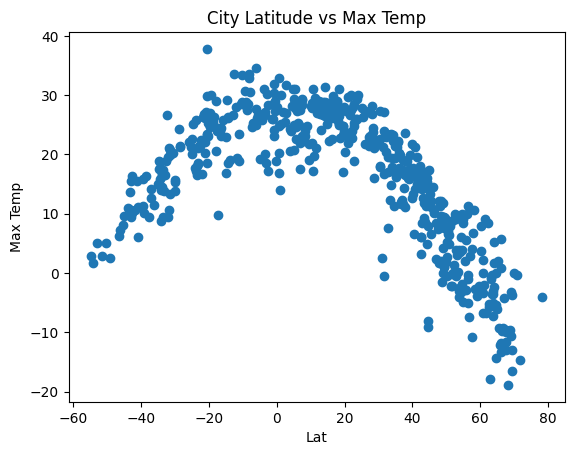

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

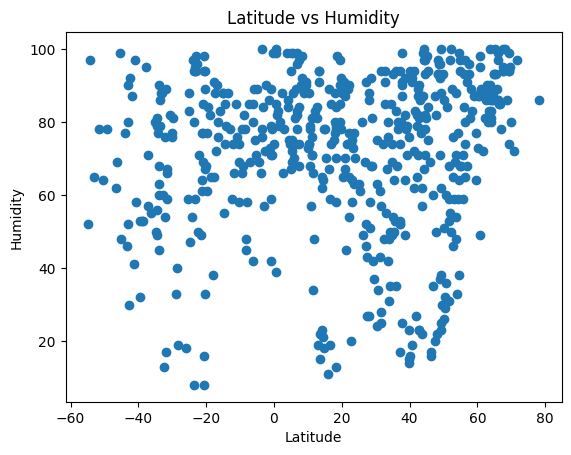

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

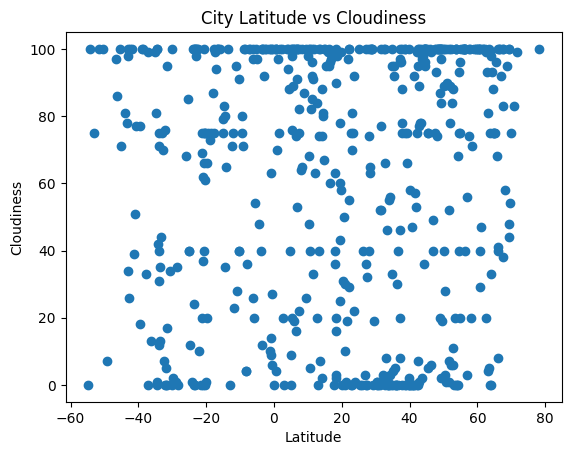

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

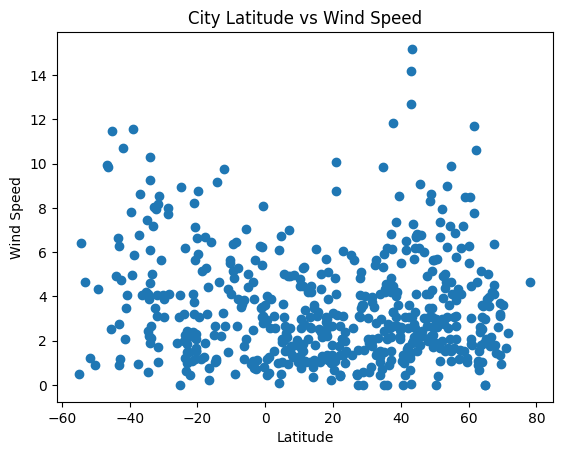

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linReg(x, y, xLabel, yLabel, a, b):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    

    regression_line = slope * x + intercept
    print(f'r-value is: {r_value}')

    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red', label='Lin Reg')
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,st. john's,47.5649,-52.7093,8.39,87,75,4.12,CA,1698379126
6,klyuchi,52.2667,79.1667,-0.04,50,6,7.96,RU,1698379172
7,tangalle,6.0240,80.7911,28.09,70,19,2.33,LK,1698379172
8,petropavlovsk-kamchatsky,53.0452,158.6483,3.03,59,0,5.00,RU,1698379173
10,bikaner,28.0167,73.3000,28.15,27,74,4.07,IN,1698379173


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.57,83,40,4.07,PN,1698379170
1,coquimbo,-29.9533,-71.3436,13.85,76,100,3.09,CL,1698379130
2,grytviken,-54.2811,-36.5092,1.62,97,100,6.42,GS,1698379171
3,port moresby,-9.4431,147.1797,30.68,66,75,5.14,PG,1698379171
4,waitangi,-43.9535,-176.5597,11.01,77,81,4.92,NZ,1698379171


###  Temperature vs. Latitude Linear Regression Plot

r-value is: -0.8842738673409388


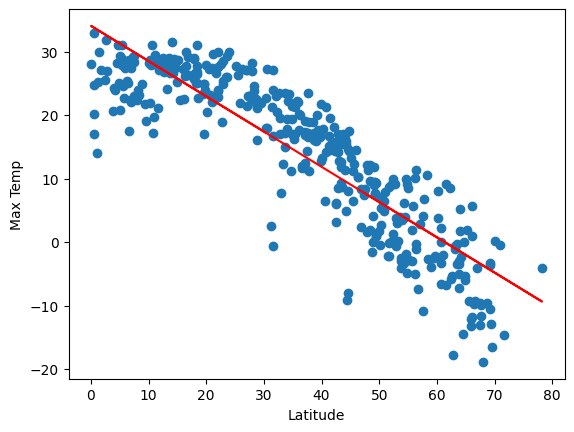

In [20]:
# Linear regression on Northern Hemisphere
linReg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 30, -15)

r-value is: 0.8054064565588774


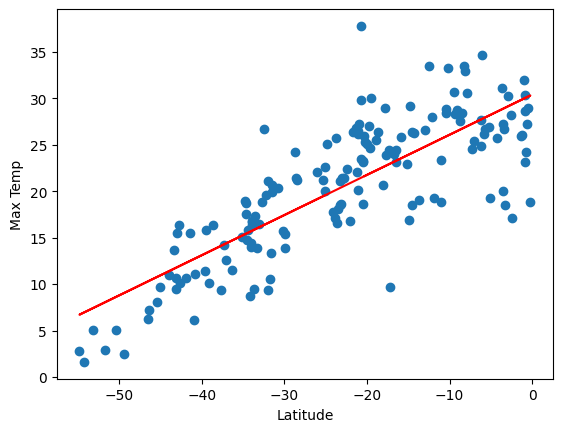

In [21]:
# Linear regression on Southern Hemisphere
linReg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 30, -15)

**Discussion about the linear relationship:** there appears to be corralation with the maximum temperatures as the lattitude increases or decreases. this however, is shows a large margin of error

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.09457176277965278


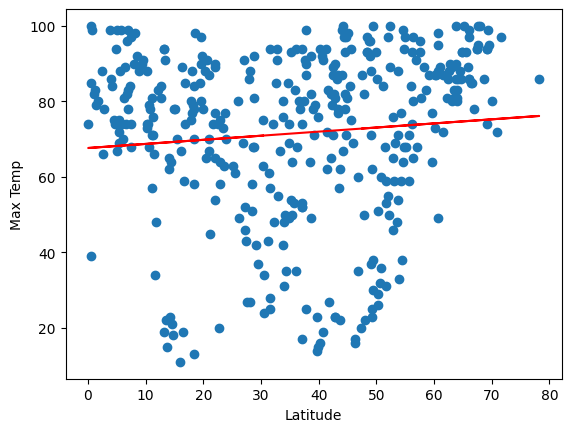

In [22]:
# Northern Hemisphere
linReg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Max Temp', 30, -15)

r-value is: 0.15015779421211728


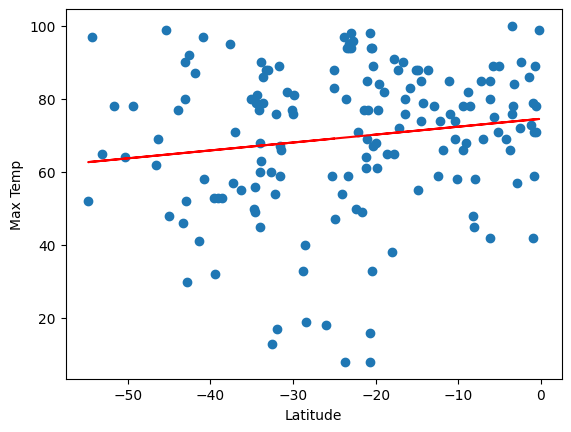

In [23]:
# Southern Hemisphere
linReg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Max Temp', 30, -15)

**Discussion about the linear relationship:** There is no relationship between latitude and humidity. Humidity could have better comparatives, such as max temp (perhaps)

### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.06808343341383118


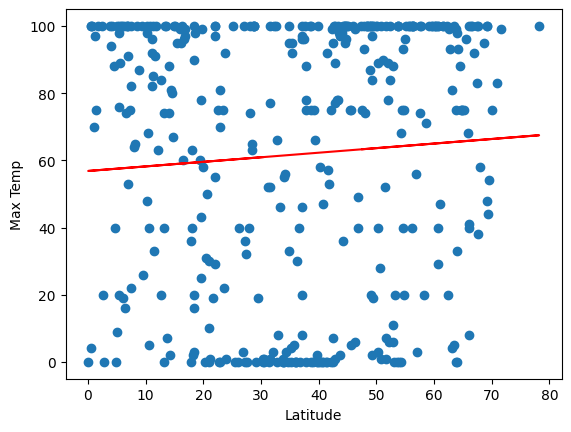

In [24]:
# Northern Hemisphere
linReg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Max Temp', 30, -15)

r-value is: 0.06870284259889904


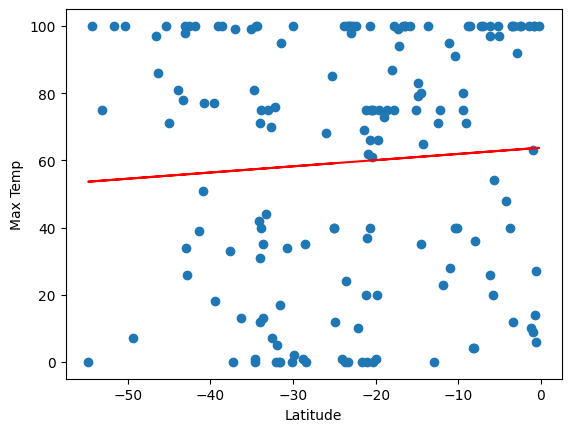

In [25]:
# Southern Hemisphere
linReg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Max Temp', 30, -15)

**Discussion about the linear relationship:** No relationship at all

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.17017303734526612


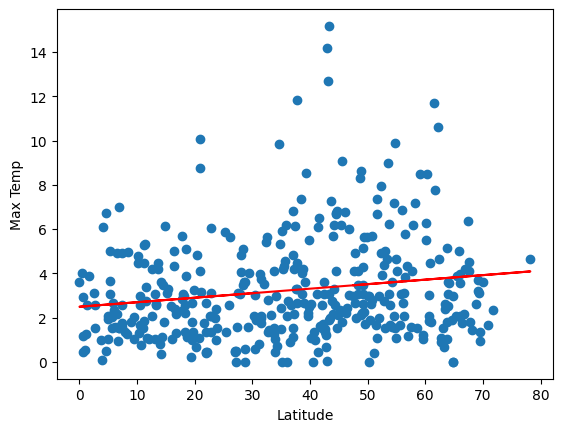

In [26]:
# Northern Hemisphere
linReg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Max Temp', 30, -15)

r-value is: -0.18869205390970709


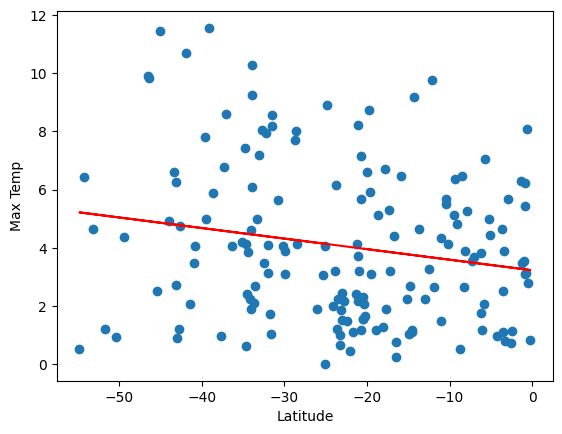

In [27]:
# Southern Hemisphere
linReg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Max Temp', 30, -15)

**Discussion about the linear relationship:** While there appears to be no corralation, we can see certain behaviors that the data has. there appears to be more data poins under the line than above it.